In [1]:
# basic data manipulation modules
import pandas as pd  
import numpy as np  

# metrics
from sklearn import metrics
#confusion_matrix, roc_curve, roc_auc_score, f1_score, accuracy_score, classification_report  

# Undersampling modules dependencies
from imblearn.under_sampling import RandomUnderSampler   

# preprocessing modules
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline  
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score



#classifiers
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression  


#data visualisation modules
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
# Read data  
df = pd.read_csv('cleaned_data.csv') #loading data

In [3]:
# converting multiclass labels to binary df
def binary_label(df):
    df.loc[df['Label'] != 'Benign', 'Label'] = 'Abnormal'
    return df

df = binary_label(df)
df.replace([np.inf, - np.inf], np.nan, inplace = True)
df.dropna(inplace=True)
df.reset_index(drop=True)


,Unnamed: 0,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,21,6,21,1,1,0,0.0,0,0,...,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abnormal
1,1,21,6,3,1,1,0,0.0,0,0,...,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abnormal
2,2,21,6,3,1,1,0,0.0,0,0,...,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abnormal
3,3,21,6,3,1,1,0,0.0,0,0,...,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abnormal
4,4,21,6,2,1,1,0,0.0,0,0,...,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8247883,8284190,53,17,61898,2,2,78,254.0,39,39,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
8247884,8284191,1500,6,86213373,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,86213373.0,0.0,86213373.0,86213373.0,Benign
8247885,8284192,53,17,642,1,1,39,67.0,39,39,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
8247886,8284193,53,17,78472,1,1,32,121.0,32,32,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [4]:
df.drop(columns= ['Unnamed: 0'], inplace=True) # dropping unnecessary columns

In [5]:
data = df.copy() #copying the dataframe

### **Resampling**

In [6]:
df_normal = df[df['Label'] == 'Benign']
df_abnormal = df[df['Label'] == 'Abnormal']

In [7]:
sample_size = 200000  # Size of the smaller dataset for each label
df_normal_sample = resample(df_normal, n_samples=sample_size, random_state=42)
df_abnormal_sample = resample(df_abnormal, n_samples=sample_size, random_state=42)


In [8]:
df_sampled = pd.concat([df_normal_sample, df_abnormal_sample])
df_sampled = df_sampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [9]:
df_sampled

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,151497,10,7,510,4777.0,194,0,51.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,53,17,1503,1,1,31,158.0,31,31,31.000000,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,80,6,54722204,2,0,0,0.0,0,0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,41736,6,4480717,5,3,935,371.0,935,0,187.000000,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,21,6,3,1,1,0,0.0,0,0,0.000000,...,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,21,6,2,1,1,0,0.0,0,0,0.000000,...,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abnormal
399996,21,6,2,1,1,0,0.0,0,0,0.000000,...,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abnormal
399997,3389,6,3820694,10,7,1148,1581.0,677,0,114.800000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
399998,3389,6,3657569,15,8,1460,1731.0,741,0,97.333333,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


#### **Label Encoding**

In [10]:
labelencoder = LabelEncoder()
df_sampled.loc[:, df_sampled.columns[-1]] = labelencoder.fit_transform(df_sampled.iloc[:, -1])
df_sampled.Label.value_counts()

/var/folders/pl/n9dpnr6j189_tc7zv1jcdnph0000gn/T/ipykernel_966/3751164805.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_sampled.loc[:, df_sampled.columns[-1]] = labelencoder.fit_transform(df_sampled.iloc[:, -1])


1    200000
0    200000
Name: Label, dtype: int64

In [11]:
X = df_sampled.drop(['Label'], axis=1)
y = df_sampled['Label']

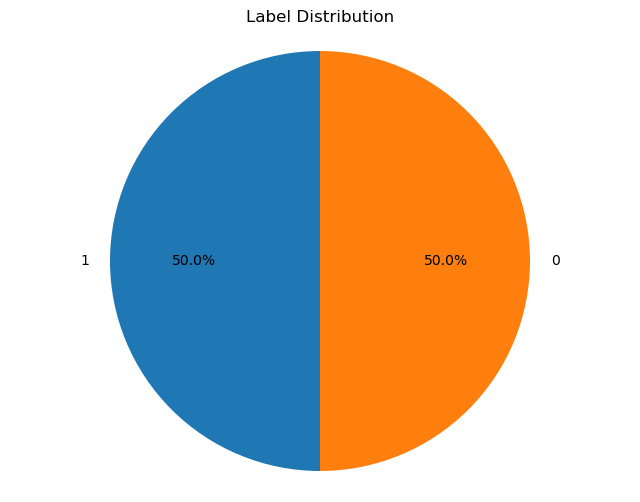

In [12]:
# Calculate label counts
label_counts = y.value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.title('Label Distribution')
plt.show()

In [13]:
# scaler
df_scaled = StandardScaler().fit_transform(X)
# Converting back to dataframe
df_features = X.columns.tolist()
X = pd.DataFrame(data = df_scaled, columns = df_features) # nomalized features

**Hyperparameter Optimisation**

**Random Forest**

In [14]:
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

In [15]:
RF_clf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=RF_clf, param_grid=param_grid, cv=5)
grid_search.fit(X, y)


best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.9652350000000001


Best Hyperparams for Random Forest;

`Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}`

`Best Score: 0.9652350000000001`

**Logistic Regression**

In [16]:

param_grid = {
    'penalty': ['l1', 'l2'],  
    'C': [0.1, 1.0, 10.0]  
}

logreg = LogisticRegression(max_iter=10000)

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py

Best Hyperparameters: {'C': 10.0, 'penalty': 'l2'}
Best Score: 0.9275650000000001


Best Parameters for Logistic Regression:

`Best Hyperparameters: {'C': 10.0, 'penalty': 'l2'}`

`Best Score: 0.9275650000000001`

### **Data Resampling**

In [6]:

data["Label"] = data["Label"].replace("Abnormal", 1)
data["Label"] = data["Label"].replace("Benign", 0)
data.Label.value_counts()

0    6077145
1    2170743
Name: Label, dtype: int64

In [7]:
x = data.drop(['Label'], axis=1)
y = data['Label']

In [8]:
under = RandomUnderSampler(sampling_strategy=1.0, random_state=222)  
X, Y = under.fit_resample(x, y)


In [9]:
df = pd.concat([X, Y], axis=1)  
df.to_csv("Sample.csv", index=False)

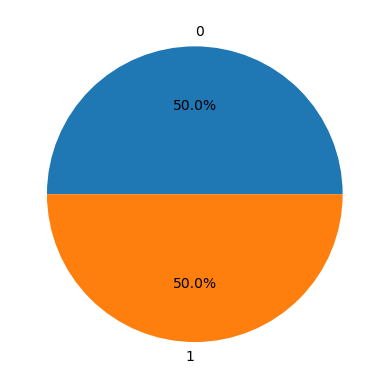

In [10]:
df['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%')  # Plot a pie chart
plt.ylabel('')
plt.show()

### **Feature Selection**

In [11]:
fs = RandomForestClassifier()
fs.fit(X, Y)
importances = fs.feature_importances_
indices = np.argsort(importances)[::1]

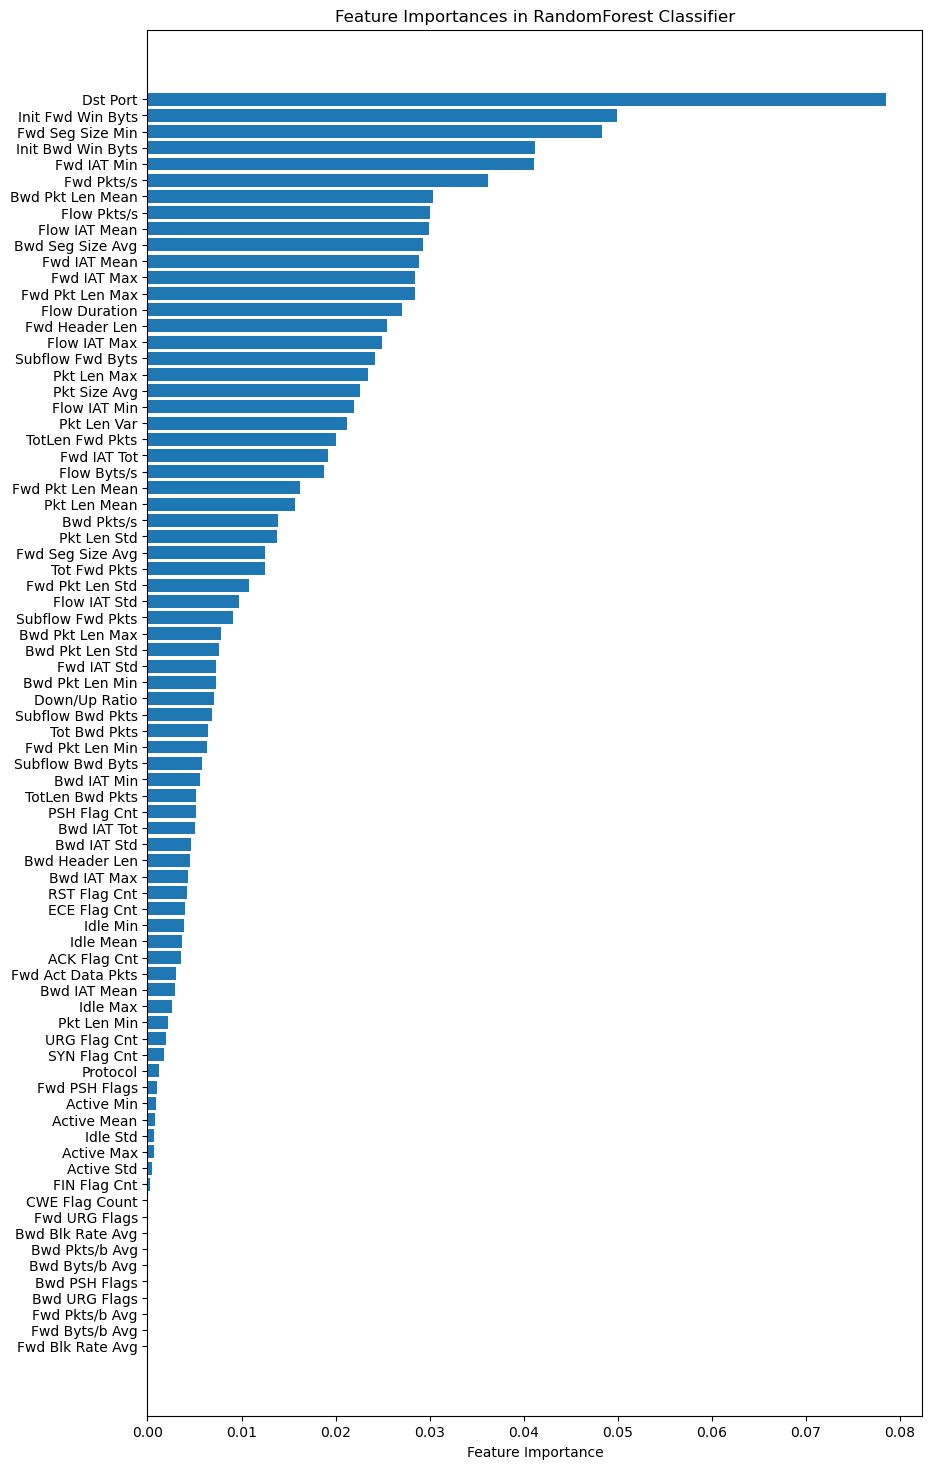

In [12]:
feature_names = X.columns
fig, ax = plt.subplots(figsize=(10, 18))
ax.barh(range(len(indices)), importances[indices], align='center')
ax.set_yticks(range(len(indices)))
ax.set_yticklabels(feature_names[indices])
ax.set_xlabel('Feature Importance')
ax.set_title('Feature Importances in RandomForest Classifier')
plt.show()


In [13]:
# Select features with importance > mean importance
threshold = np.mean(importances)  # Normalize the threshold  
sfm = SelectFromModel(fs, threshold=threshold)  
sfm.fit(X, Y)  
selected_features = list(X.columns[sfm.get_support()])

In [14]:
# Create reduced DataFrame  
sel_df = df[selected_features + ['Label']]  
sel_df.columns

Index(['Dst Port', 'Flow Duration', 'TotLen Fwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Mean', 'Bwd Pkt Len Max', 'Bwd Pkt Len Mean',
       'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Max',
       'Fwd IAT Min', 'Fwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Var', 'Fwd Seg Size Avg',
       'Bwd Seg Size Avg', 'Subflow Fwd Byts', 'Init Fwd Win Byts',
       'Init Bwd Win Byts', 'Fwd Seg Size Min', 'Label'],
      dtype='object')

#### **Spliting Data**

In [15]:
X = sel_df.drop(['Label'], axis=1)
y = sel_df['Label']


In [16]:
#split training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=123)

### **Helper Functions**

In [17]:
def plot_confusion_matrix(y_true, y_pred):
    cm = metrics.confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    class_labels = ['Benign', 'Abnormal']
    plt.xticks(ticks=[0.5, 1.5], labels=class_labels)
    plt.xlabel('Predicted')
    plt.yticks(ticks=[0.5, 1.5], labels=class_labels)
    plt.ylabel('True')
    plt.show()

In [18]:
def print_metrics(y_true, y_pred):
    print('Accuracy:', metrics.accuracy_score(y_true, y_pred))
    print('Precision:', metrics.precision_score(y_true, y_pred))
    print('Recall:', metrics.recall_score(y_true, y_pred))
    print('F1 Score:', metrics.f1_score(y_true, y_pred))


In [19]:
def plot_roc_curve(y_true, y_prob):
    fpr, tpr, _ = metrics.roc_curve(y_true, y_prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


### **Optimized Modelling**
- Random Forest



In [20]:
rf_params = {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}

In [21]:
RF_best = RandomForestClassifier(**rf_params,random_state=123)
RF_best.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200, random_state=123)

In [22]:
y_pred_RF = RF_best.predict(X_test)

In [23]:
print_metrics(y_test, y_pred_RF)

Accuracy: 0.9649060575977372
Precision: 0.9876060579735325
Recall: 0.9417021785750445
F1 Score: 0.9641080245750254


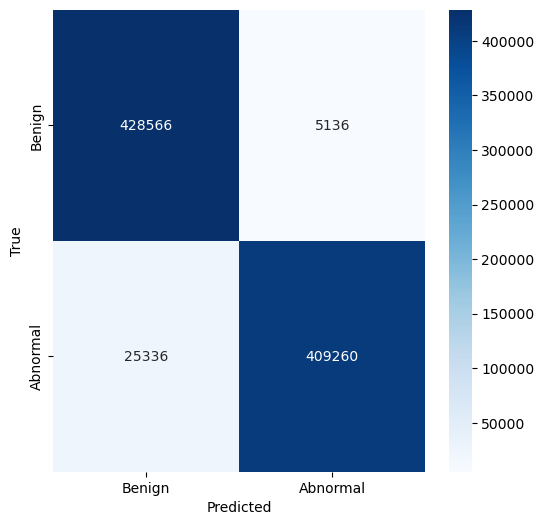

In [24]:
plot_confusion_matrix(y_test, y_pred_RF)

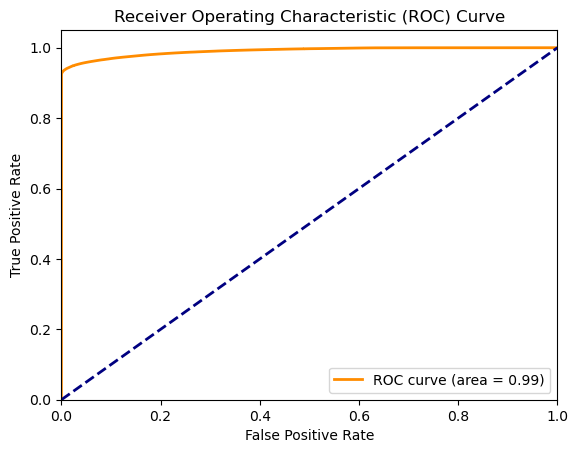

In [25]:
# get the predicted probabilities
y_prob_RF = RF_best.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_prob_RF)

- Logistic Regression

In [26]:
lr_param = {'C': 10.0, 'penalty': 'l2'}

In [27]:
LR_best = LogisticRegression(**lr_param, random_state=123, max_iter=10000)
LR_best.fit(X_train,y_train)

LogisticRegression(C=10.0, max_iter=10000, random_state=123)

In [28]:
y_pred_LR =LR_best.predict(X_test)

In [29]:
print_metrics(y_test, y_pred_LR)

Accuracy: 0.843853147191402
Precision: 0.8813526032792237
Recall: 0.7950579388673619
F1 Score: 0.8359842252975902


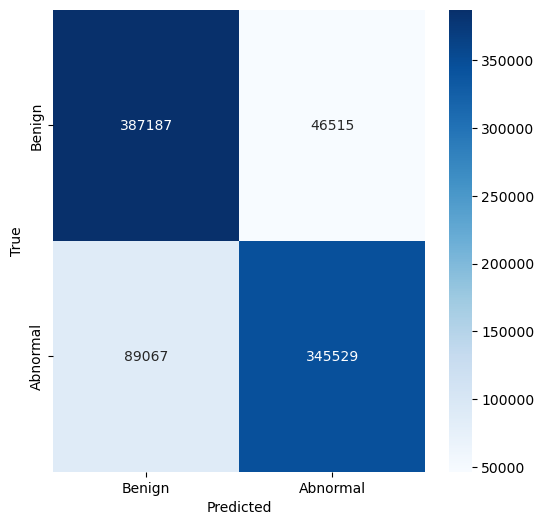

In [30]:
plot_confusion_matrix(y_test, y_pred_LR)

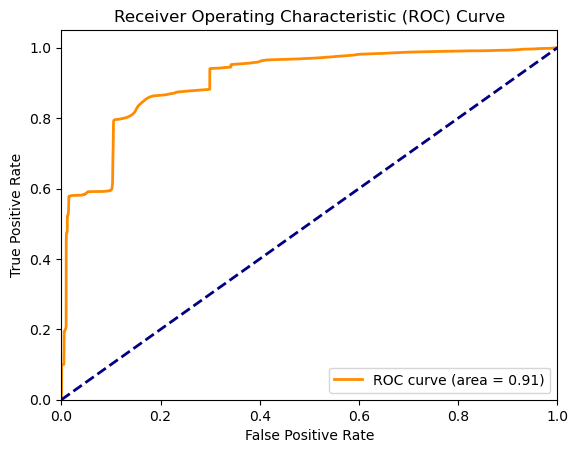

In [31]:
# get the predicted probabilities
y_prob_LR= LR_best.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_prob_LR)

- Ensemble Voting

In [32]:
estimators= [('rf', RF_best), ('log_reg', LR_best)]
Voting_clf = VotingClassifier(estimators, voting='hard')

In [33]:
#fit model to training data
Voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(min_samples_leaf=2,
                                                     min_samples_split=10,
                                                     n_estimators=200,
                                                     random_state=123)),
                             ('log_reg',
                              LogisticRegression(C=10.0, max_iter=10000,
                                                 random_state=123))])

In [34]:
y_pred_Voting_clf = Voting_clf.predict(X_test)

In [35]:
print_metrics(y_test, y_pred_Voting_clf)

Accuracy: 0.8911479699365886
Precision: 0.9935562521769419
Recall: 0.7876280499590425
F1 Score: 0.8786881542671439


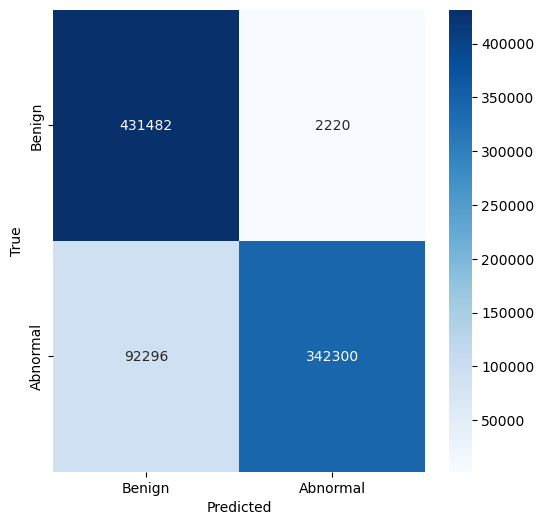

In [36]:
plot_confusion_matrix(y_test, y_pred_Voting_clf)